# Mini-projet – Ensemble Learning

## A- Base des données

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_excel('beer_quality.xlsx')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- Analyse Rapide des Données d'Apprentissage ---")
print("\nDimensions de X_train (observations d'apprentissage):", X_train.shape)
print("\nStatistiques descriptives de X_train:")
print(X_train.describe().T)

print("\nDimensions de y_train (labels d'apprentissage):", y_train.shape)
print("\nDistribution de la variable y_train (Quality):")
print(y_train.value_counts(normalize=True).sort_index())
print("\nStatistiques descriptives de y_train:")
print(y_train.describe())

data.describe()


--- Analyse Rapide des Données d'Apprentissage ---

Dimensions de X_train (observations d'apprentissage): (1119, 11)

Statistiques descriptives de X_train:
                       count       mean        std      min        25%  \
fixed acidity         1119.0   8.309562   1.713899  4.60000   7.100000   
volatile acidity      1119.0   0.533132   0.182022  0.12000   0.400000   
citric acid           1119.0   0.270250   0.195492  0.00000   0.090000   
residual sugar        1119.0   2.548302   1.427730  0.90000   1.900000   
chlorides             1119.0   0.087711   0.047143  0.01200   0.071000   
free sulfur dioxide   1119.0  15.920465  10.273166  1.00000   7.000000   
total sulfur dioxide  1119.0  46.966488  33.036693  6.00000  22.000000   
density               1119.0   0.996778   0.001840  0.99007   0.995685   
pH                    1119.0   3.314272   0.153980  2.74000   3.220000   
sulphates             1119.0   0.658820   0.172242  0.37000   0.550000   
alcohol               1119.0  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## B- Classification binaire

In [ ]:
# 1

m = y_train.median()

print(m)

ybin_train = (y_train >= m).astype(int)
ybin_test = (y_test >= m).astype(int)

print(y.unique())
print(ybin_train.value_counts(normalize=True))

6.0
[5 6 7 4 8 3]
quality
1    0.525469
0    0.474531
Name: proportion, dtype: float64


In [ ]:
# --- Arbre de décision (Optimisation de base) ---
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Optimisation d'un arbre de décision avec Random Search
dt_base = DecisionTreeClassifier(random_state=42)
param_dist = {
    'max_depth': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 11),
    'criterion': ['gini', 'entropy']
}

# Mesure du temps d'apprentissage
random_search_start_time = time.time()

dt_random_search = RandomizedSearchCV(
    dt_base,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)
dt_random_search.fit(X_train, ybin_train)
dt_fit_time = time.time() - random_search_start_time

dt_best = dt_random_search.best_estimator_

# 2. Mesurer le temps d'inférence
dt_inference_start_time = time.time()
y_pred_dt = dt_best.predict(X_test)
dt_inference_time = time.time() - dt_inference_start_time

print("\n--- B.2. Arbre de Décision Optimisé ---")
print(f"Meilleurs paramètres: {dt_random_search.best_params_}")
print(f"Accuracy de validation (CV): {dt_random_search.best_score_:.4f}")
print(f"Accuracy sur l'ensemble de test (évaluation finale): {accuracy_score(ybin_test, y_pred_dt):.4f}")
print(f"Temps d'apprentissage: {dt_fit_time:.4f}s")
print(f"Temps d'inférence (sur X_test): {dt_inference_time:.6f}s")


--- B.2. Arbre de Décision Optimisé ---
Meilleurs paramètres: {'min_samples_leaf': np.int64(7), 'max_depth': np.int64(9), 'criterion': 'gini'}
Accuracy de validation (CV): 0.7400
Accuracy sur l'ensemble de test (évaluation finale): 0.7208
Temps d'apprentissage: 5.6217s
Temps d'inférence (sur X_test): 0.002206s


In [ ]:
# --- AdaBoost ---
n_estimators_range = np.arange(1, 201, 10)

def plot_ada_performance_cv_and_time(max_depth, n_estimators_range, X_tr, y_tr):
    train_scores = []
    cv_scores = []
    fit_times = []

    print(f"  -> Analyse en cours pour max_depth={max_depth}...")

    for n in n_estimators_range:
        base_estimator = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        ada = AdaBoostClassifier(
            estimator=base_estimator,
            n_estimators=n,
            random_state=42
        )

        # Mesure du temps d'apprentissage (Fit)
        t_start_fit = time.time()
        ada.fit(X_tr, y_tr)
        fit_times.append(time.time() - t_start_fit)

        # Score d'APPRENTISSAGE
        train_score = ada.score(X_tr, y_tr)
        train_scores.append(train_score)

        # Score de VALIDATION (CV=5)
        cv_result = cross_val_score(ada, X_tr, y_tr, cv=5, scoring='accuracy', n_jobs=-1)
        cv_scores.append(cv_result.mean())

    # Tracé
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, label=f'Apprentissage (max_depth={max_depth})', marker='o', linestyle='--')
    plt.plot(n_estimators_range, cv_scores, label=f'Validation (CV=5) (max_depth={max_depth})', marker='x')
    plt.title(f'Accuracy vs. n_estimators pour AdaBoost (max_depth={max_depth})')
    plt.xlabel('Nombre d\'estimateurs (n_estimators)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    best_n_index = np.argmax(cv_scores)
    best_n = n_estimators_range[best_n_index]
    best_score = cv_scores[best_n_index]

    best_fit_time = fit_times[best_n_index]

    return best_n, best_score, best_fit_time


--- B.3. AdaBoost : Analyse de Performance et Temps ---
  -> Analyse en cours pour max_depth=1...


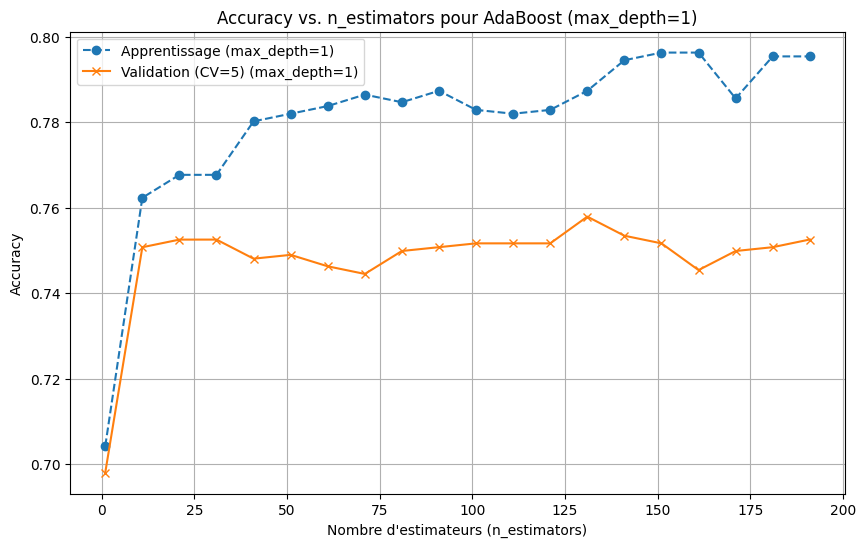

  > max_depth=1: Meilleure CV Acc.=0.7579 (n_estimators=131), Temps d'Apprentissage=0.3689s


In [ ]:
# Tracés pour max_depth=1
print("\n--- B.3. AdaBoost : Analyse de Performance et Temps ---")

best_n_1, best_score_1, best_time_1 = plot_ada_performance_cv_and_time(1, n_estimators_range, X_train, ybin_train)
print(f"  > max_depth=1: Meilleure CV Acc.={best_score_1:.4f} (n_estimators={best_n_1}), Temps d'Apprentissage={best_time_1:.4f}s")


--- AdaBoost : Analyse de Performance et Temps ---
  -> Analyse en cours pour max_depth=5...


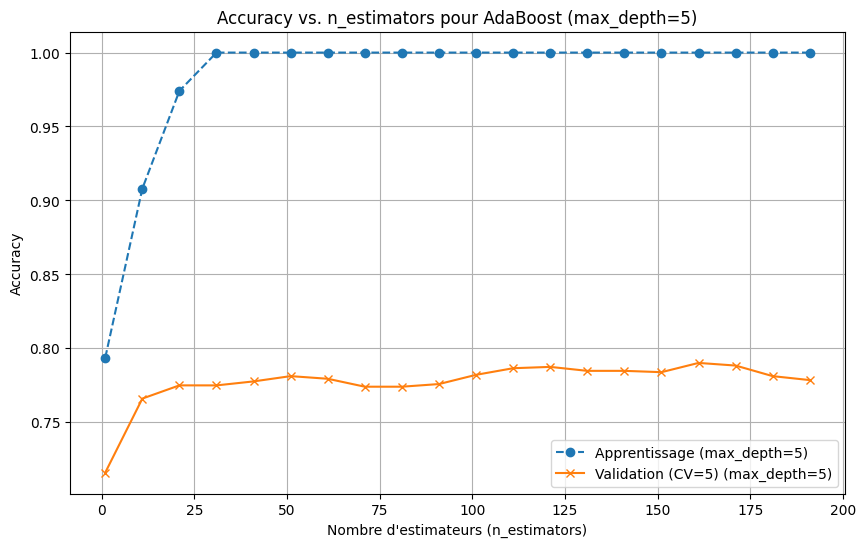

  > max_depth=5: Meilleure CV Acc.=0.7900 (n_estimators=161), Temps d'Apprentissage=1.0724s


In [ ]:
# Tracés pour max_depth=5 avec mesure de temps
print("\n--- AdaBoost : Analyse de Performance et Temps ---")

best_n_5, best_score_5, best_time_5 = plot_ada_performance_cv_and_time(5, n_estimators_range, X_train, ybin_train)
print(f"  > max_depth=5: Meilleure CV Acc.={best_score_5:.4f} (n_estimators={best_n_5}), Temps d'Apprentissage={best_time_5:.4f}s")

In [ ]:
print("\n--- B.3. Évaluation Finale des Deux Solutions Optimales sur l'Ensemble de Test ---")

# --- Modèle 1 : max_depth=1 (Optimal) ---
ada_optimal_1 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=best_n_1,
    random_state=42
)

# Entraînement final (le temps d'apprentissage 'best_time_1' est déjà mesuré)
ada_optimal_1.fit(X_train, ybin_train)

# Mesure du temps d'inférence
t_start_inf_1 = time.time()
y_pred_1 = ada_optimal_1.predict(X_test)
t_inf_1 = time.time() - t_start_inf_1

acc_1 = accuracy_score(ybin_test, y_pred_1)

print(f"\n[Solution 1: max_depth=1, n_estimators={best_n_1}]")
print(f"Accuracy Test: {acc_1:.4f}")
print(f"Temps d'Apprentissage (validation): {best_time_1:.4f}s")
print(f"Temps d'Inférence: {t_inf_1:.6f}s")

# --- Modèle 2 : max_depth=5 (Optimal) ---
ada_optimal_5 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
    n_estimators=best_n_5,
    random_state=42
)

# Entraînement final
ada_optimal_5.fit(X_train, ybin_train)

# Mesure du temps d'inférence
t_start_inf_5 = time.time()
y_pred_5 = ada_optimal_5.predict(X_test)
t_inf_5 = time.time() - t_start_inf_5

acc_5 = accuracy_score(ybin_test, y_pred_5)

print(f"\n[Solution 2: max_depth=5, n_estimators={best_n_5}]")
print(f"Accuracy Test: {acc_5:.4f}")
print(f"Temps d'Apprentissage (validation): {best_time_5:.4f}s")
print(f"Temps d'Inférence: {t_inf_5:.6f}s")


--- B.3. Évaluation Finale des Deux Solutions Optimales sur l'Ensemble de Test ---

[Solution 1: max_depth=1, n_estimators=131]
Accuracy Test: 0.7479
Temps d'Apprentissage (validation): 0.3689s
Temps d'Inférence: 0.028151s

[Solution 2: max_depth=5, n_estimators=161]
Accuracy Test: 0.8063
Temps d'Apprentissage (validation): 1.0724s
Temps d'Inférence: 0.092228s


### **Solution optimale:**

- Accuracy: Solution 2 (max_deph=5)
- Temps d'inférence: Solution 2 (max_deph=5)

La solution optimale est donc la **Solution 2 (max_deph = 5)**

### **Importance des caractéristiques:**

Peut-on mesurer l’importance d’une caractéristique dans la décision AdaBoost ? Expliquez.


 Oui, on peut mesurer l'importance des caractéristiques das l'AdaBoost.L'importance est dérivée de l'utilisation de chaque caractéristique dans les arbres de décision successifs, pondérée par le poids de chaque arbre dans le vote final1

In [ ]:
feature_importance = ada_optimal_5.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]

print("\nImportance des caractéristiques du Modèle Optimal:")
for i in sorted_idx:
    print(f" {feature_names[i]}: {feature_importance[i]:.4f}")


Importance des caractéristiques du Modèle Optimal:
 density: 0.1163
 chlorides: 0.1124
 volatile acidity: 0.0973
 alcohol: 0.0931
 total sulfur dioxide: 0.0920
 sulphates: 0.0914
 pH: 0.0902
 citric acid: 0.0862
 fixed acidity: 0.0786
 residual sugar: 0.0723
 free sulfur dioxide: 0.0702


### **Conclusion sur le biais et la variance:**

- Le modèle AdaBoost utilisant **max_depth=1** présente le meilleur compromis Biais/Variance. Bien qu'il ait un biais plus élevé (incapacité à atteindre une performance parfaite sur le jeu d'apprentissage), sa variance est faible, ce qui garantit une bonne robustesse et une meilleure généralisation sur de nouvelles données.

- Le modèle AdaBoost avec **max_depth=5** a un très faible biais mais une variance excessive, ce qui conduit à un **sur-apprentissage** et le rend inutilisable en pratique.


---
*Morale de l'histore:*
> un max_deph élevé conduit à du sur-apprentissage

> un max_deph faible conduit à du sous-apprentissage

## C- Classification multiclasse

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.base import clone
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# 1. Mise à l'échelle (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. la variable multiclasse ymulti à 3 modalités
# Utilisation des quantiles 33% et 66% pour la discrétisation des notes de qualité
q1 = y_train.quantile(0.33)
q2 = y_train.quantile(0.66)

def create_ymulti(y_data, q1, q2):
    return np.select(
        [y_data < q1, (y_data >= q1) & (y_data < q2), y_data >= q2],
        [0, 1, 2]
    )

y_train_multi = create_ymulti(y_train, q1, q2)
y_test_multi = create_ymulti(y_test, q1, q2)

print("Effectifs des classes dans y_train_multi (avant équilibrage):\n", pd.Series(y_train_multi).value_counts().sort_index())

# 3. Équilibrer les données d'apprentissage (SMOTE)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_multi)

print("\nEffectifs des classes dans y_train_smote (après SMOTE):\n", pd.Series(y_train_smote).value_counts().sort_index())

# Stockage des jeux de données pour les phases suivantes
data_sets = {
    'X_train_scaled': X_train_scaled,
    'X_test_scaled': X_test_scaled,
    'y_train_multi': y_train_multi,
    'y_test_multi': y_test_multi,
    'X_train_smote': X_train_smote,
    'y_train_smote': y_train_smote,
}

Effectifs des classes dans y_train_multi (avant équilibrage):
 0     45
1    486
2    588
Name: count, dtype: int64

Effectifs des classes dans y_train_smote (après SMOTE):
 0    588
1    588
2    588
Name: count, dtype: int64


In [ ]:
# -------------------------------------------------------------------------------------
# A. Réseau de Neurones (RN)
# -------------------------------------------------------------------------------------

print("--- C. Partie 1, A : Réseau de Neurones (RN) ---")

# Utilisation de l'early stopping intégré
mlp = MLPClassifier(
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=500
)

# Hyperparamètres à optimiser (gardons les mêmes paramètres pour comparer l'impact du score)
params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]
}

# CHANGEMENT CLÉ : Utilisation de 'f1_macro' pour prioriser la classe minoritaire
t_start_rn_search_macro = time.time()
rn_random_search_macro = RandomizedSearchCV(
    mlp,
    param_distributions=params,
    n_iter=20, # 20 itérations
    scoring='f1_macro', # OPTIMISATION SUR LE F1-SCORE MACRO
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Optimisation sur les données NON équilibrées (comme initialement)
rn_random_search_macro.fit(X_train_scaled, y_train_multi)
t_fit_rn_search_macro = time.time() - t_start_rn_search_macro

rn_best_macro = rn_random_search_macro.best_estimator_

# Mesure du temps d'inférence (sur le RN optimal macro)
t_start_inf_rn_macro = time.time()
y_pred_rn_macro_deseq = rn_best_macro.predict(X_test_scaled)
t_inf_rn_macro = time.time() - t_start_inf_rn_macro

# Calcul des F1-scores pour la comparaison (Weighted et Macro)
f1_weighted_deseq = f1_score(y_test_multi, y_pred_rn_macro_deseq, average='weighted')
f1_macro_deseq = f1_score(y_test_multi, y_pred_rn_macro_deseq, average='macro')


print(f"\n[RN Optimal (F1-MACRO) - Cas DÉSÉQUILIBRÉ]")
print(f"Meilleurs paramètres: {rn_random_search_macro.best_params_}")
print(f"F1-score Test (MACRO): {f1_macro_deseq:.4f}")
print(f"F1-score Test (PONDÉRÉ): {f1_weighted_deseq:.4f}")
print(f"Temps d'apprentissage (Search+Fit): {t_fit_rn_search_macro:.4f}s")
print(f"Temps d'inférence: {t_inf_rn_macro:.6f}s")


# 5. Étude des matrices de confusion (après optimisation macro)
print("\n--- Analyse des Matrices de Confusion (RN Optimal F1-MACRO) ---")

cm_deseq_macro = confusion_matrix(y_test_multi, y_pred_rn_macro_deseq)
print("\na) Matrice de Confusion (DÉSÉQUILIBRÉES - RN F1-MACRO):")
print(cm_deseq_macro)


rn_balanced_macro = clone(rn_best_macro)
t_start_fit_eq_macro = time.time()
rn_balanced_macro.fit(X_train_smote, y_train_smote)
t_fit_eq_macro = time.time() - t_start_fit_eq_macro

t_start_inf_eq_macro = time.time()
y_pred_rn_eq_macro = rn_balanced_macro.predict(X_test_scaled)
t_inf_eq_macro = time.time() - t_start_inf_eq_macro

f1_weighted_eq = f1_score(y_test_multi, y_pred_rn_eq_macro, average='weighted')
f1_macro_eq = f1_score(y_test_multi, y_pred_rn_eq_macro, average='macro')

cm_eq_macro = confusion_matrix(y_test_multi, y_pred_rn_eq_macro)
print("\nb) Matrice de Confusion (ÉQUILIBRÉES - RN F1-MACRO ré-entrainé sur SMOTE):")
print(cm_eq_macro)


print(f"\n[RN Optimal (F1-MACRO) - Cas ÉQUILIBRÉ]")
print(f"F1-score Test (MACRO): {f1_macro_eq:.4f}")
print(f"F1-score Test (PONDÉRÉ): {f1_weighted_eq:.4f}")
print(f"Temps d'apprentissage (Fit SMOTE): {t_fit_eq_macro:.4f}s")
print(f"Temps d'inférence: {t_inf_eq_macro:.6f}s")

# Variable pour la phase suivante (Bagging)
rn_optimal_base_estimator = clone(rn_best_macro)

--- C. Partie 1, A : Réseau de Neurones (RN) ---

[RN Optimal (F1-MACRO) - Cas DÉSÉQUILIBRÉ]
Meilleurs paramètres: {'learning_rate_init': 0.1, 'hidden_layer_sizes': (100,), 'alpha': 0.001}
F1-score Test (MACRO): 0.5443
F1-score Test (PONDÉRÉ): 0.6876
Temps d'apprentissage (Search+Fit): 8.0011s
Temps d'inférence: 0.001080s

--- Analyse des Matrices de Confusion (RN Optimal F1-MACRO) ---

a) Matrice de Confusion (DÉSÉQUILIBRÉES - RN F1-MACRO):
[[  4   9   5]
 [  9 108  78]
 [  1  44 222]]

b) Matrice de Confusion (ÉQUILIBRÉES - RN F1-MACRO ré-entrainé sur SMOTE):
[[  8   5   5]
 [ 26 117  52]
 [ 15  45 207]]

[RN Optimal (F1-MACRO) - Cas ÉQUILIBRÉ]
F1-score Test (MACRO): 0.5550
F1-score Test (PONDÉRÉ): 0.7052
Temps d'apprentissage (Fit SMOTE): 0.2448s
Temps d'inférence: 0.001274s


### Pourquoi le F1-score comme mesure de performance

- Le **F1-score** est adapté ici car il permet de traiter des **jeux de données déséquilibrés**

### Conclusion sur les matrices de confusion
- On constate que la matrice de confusion du jeu de données équilibrés est meilleure, ce qui montre l'importance du reéquilibrage des classes.


--- C. Partie 1, B : Bagging sur Réseau de Neurones ---
Analyse de la performance du Bagging en fonction de n_estimators...


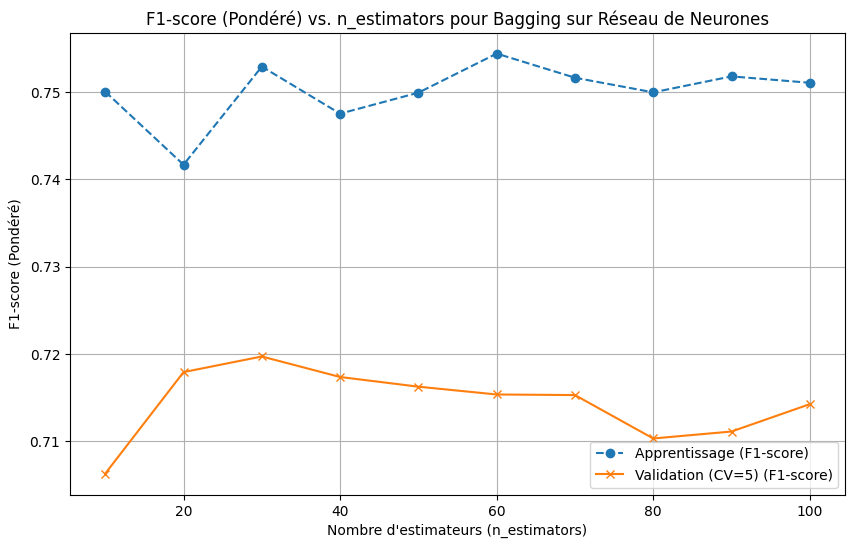


--- C. Partie 1, B : Bagging Optimal (Résultats Finaux) ---
N_estimators optimal (basé sur CV): 30
Meilleur F1-score Validation (CV): 0.7197
F1-score Test: 0.7027
Temps d'apprentissage (Optimal N=30): 3.6217s
Temps d'inférence: 0.064963s


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

print("\n--- C. Partie 1, B : Bagging sur Réseau de Neurones ---")

base_estimator = clone(rn_best_macro)
# 6. Faire un bagging en utilisant le RN optimal comme classifieur de base
n_estimators_range_bagging = np.arange(10, 101, 10) # De 10 à 100 estimateurs
f1_train_bagging = []
f1_val_bagging = []
fit_times_bagging = []

print("Analyse de la performance du Bagging en fonction de n_estimators...")

for n in n_estimators_range_bagging:
    # Création du BaggingClassifier
    # Utilisation d'un clone de l'estimateur de base pour s'assurer qu'il n'y ait pas de transfert d'état
    bagging = BaggingClassifier(
        estimator=clone(base_estimator),
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )

    # Mesure du temps d'apprentissage (Fit)
    t_start = time.time()
    bagging.fit(X_train_scaled, y_train_multi)
    t_fit_bagging = time.time() - t_start
    fit_times_bagging.append(t_fit_bagging)

    # Score d'apprentissage (F1-score pondéré)
    y_train_pred = bagging.predict(X_train_scaled)
    f1_train_bagging.append(f1_score(y_train_multi, y_train_pred, average='weighted'))

    # Score de Validation (cross_val_score avec F1-score pondéré)
    cv_scores = cross_val_score(bagging, X_train_scaled, y_train_multi, cv=5, scoring='f1_weighted', n_jobs=-1)
    f1_val_bagging.append(cv_scores.mean())


# 7. Tracer la courbe F1-score en fonction de n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range_bagging, f1_train_bagging, label='Apprentissage (F1-score)', marker='o', linestyle='--')
plt.plot(n_estimators_range_bagging, f1_val_bagging, label='Validation (CV=5) (F1-score)', marker='x')
plt.title('F1-score (Pondéré) vs. n_estimators pour Bagging sur Réseau de Neurones')
plt.xlabel('Nombre d\'estimateurs (n_estimators)')
plt.ylabel('F1-score (Pondéré)')
plt.legend()
plt.grid(True)
plt.show()

# Choisir le modèle optimal
best_n_bagging_index = np.argmax(f1_val_bagging)
best_n_bagging = n_estimators_range_bagging[best_n_bagging_index]
best_f1_val = f1_val_bagging[best_n_bagging_index]
optimal_fit_time_bagging = fit_times_bagging[best_n_bagging_index] # Temps d'apprentissage du modèle optimal

bagging_optimal = BaggingClassifier(
    estimator=clone(base_estimator),
    n_estimators=best_n_bagging,
    random_state=42,
    n_jobs=-1
)

# Entraînement final du modèle optimal
t_start_fit_optimal = time.time()
bagging_optimal.fit(X_train_scaled, y_train_multi)

t_fit_bagging_final = time.time() - t_start_fit_optimal

# Mesure du temps d'inférence
t_start_inf_bagging = time.time()
y_pred_bagging = bagging_optimal.predict(X_test_scaled)
t_inf_bagging = time.time() - t_start_inf_bagging

f1_bagging = f1_score(y_test_multi, y_pred_bagging, average='weighted')

print(f"\n--- C. Partie 1, B : Bagging Optimal (Résultats Finaux) ---")
print(f"N_estimators optimal (basé sur CV): {best_n_bagging}")
print(f"Meilleur F1-score Validation (CV): {best_f1_val:.4f}")
print(f"F1-score Test: {f1_bagging:.4f}")
print(f"Temps d'apprentissage (Optimal N={best_n_bagging}): {optimal_fit_time_bagging:.4f}s")
print(f"Temps d'inférence: {t_inf_bagging:.6f}s")

###Conclusion Optimale

- Le modèle optimal se situe là où la courbe de Validation est maximale.Modèle Optimal : $\mathbf{n\_estimators \approx 30}$ (où le F1-score de validation est le plus élevé, $\approx 0.720$).
- L'ajout de RN via Bagging a permis de stabiliser le modèle et de maintenir un niveau de performance raisonnable en validation, évitant le sur-apprentissage extrême, mais sans éliminer complètement la variance inhérente au Réseau de Neurones de base.


--- C. Partie 2 : Forêt Aléatoire ---
Analyse de F1-score vs. n_estimators (max_depth=None)...


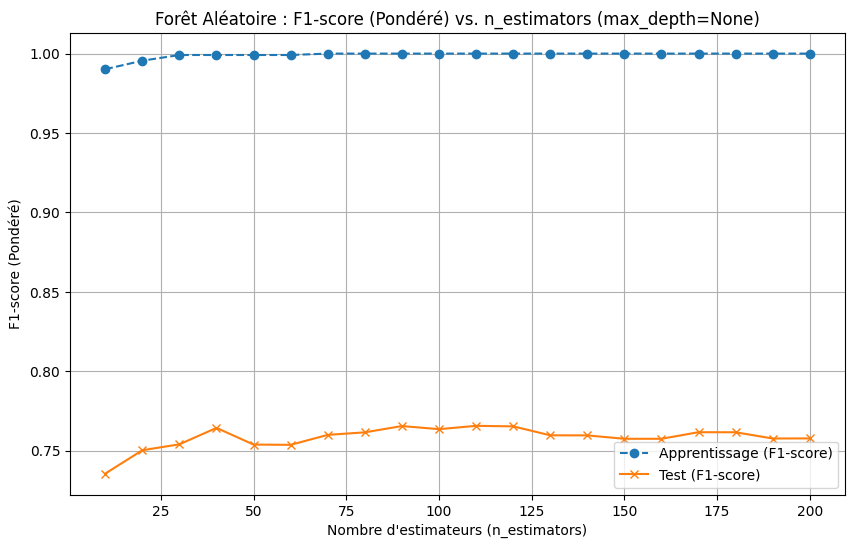


Optimisation des paramètres de la Forêt Aléatoire (Random Search)...

--- C.42. Forêt Aléatoire : Paramètres Optimaux ---
Meilleurs paramètres: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 15}
F1-score Apprentissage: 1.0000
F1-score Test: 0.7637
Temps d'apprentissage (Random Search): 109.4465s
Temps d'inférence (sur X_test): 0.035158s

--- C.43. Forêt Aléatoire : Matrices de Confusion ---

a) Matrice de Confusion (DÉSÉQUILIBRÉES - RF Optimal):
[[  0  10   8]
 [  0 146  49]
 [  0  39 228]]

b) Matrice de Confusion (ÉQUILIBRÉES - RF ré-entrainée sur SMOTE):
[[  4   6   8]
 [ 17 132  46]
 [  5  39 223]]

--- C.45. Importance des caractéristiques (Forêt Aléatoire) ---
 alcohol: 0.1888
 sulphates: 0.1169
 volatile acidity: 0.1063
 total sulfur dioxide: 0.0995
 density: 0.0920
 chlorides: 0.0786
 fixed acidity: 0.0697
 pH: 0.0660
 citric acid: 0.0647
 residual sugar: 0.0597
 free sulfur dioxide: 0.0577


In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n--- C. Partie 2 : Forêt Aléatoire ---")

# X_train_raw sera utilisé pour RF (moins sensible au scaling que le RN)
X_train_raw = X_train
X_test_raw = X_test
# ========================================================================

# 9. Entraîner une forêt aléatoire et tracer la courbe F1-score (C.39 - C.40)
n_estimators_range_rf = np.arange(10, 201, 10)
f1_train_rf = []
f1_test_rf = []

print("Analyse de F1-score vs. n_estimators (max_depth=None)...")

for n in n_estimators_range_rf:
    rf = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=42, n_jobs=-1)
    rf.fit(X_train_raw, y_train_multi)

    # Score d'apprentissage
    y_train_pred = rf.predict(X_train_raw)
    f1_train_rf.append(f1_score(y_train_multi, y_train_pred, average='weighted'))

    # Score de Test
    y_test_pred = rf.predict(X_test_raw)
    f1_test_rf.append(f1_score(y_test_multi, y_test_pred, average='weighted'))

# Tracer la courbe F1-score en fonction de n_estimators pour max_depth=None
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range_rf, f1_train_rf, label='Apprentissage (F1-score)', marker='o', linestyle='--')
plt.plot(n_estimators_range_rf, f1_test_rf, label='Test (F1-score)', marker='x')
plt.title('Forêt Aléatoire : F1-score (Pondéré) vs. n_estimators (max_depth=None)')
plt.xlabel('Nombre d\'estimateurs (n_estimators)')
plt.ylabel('F1-score (Pondéré)')
plt.legend()
plt.grid(True)
plt.show()

# 10. Recherche aléatoire pour optimiser max_depth et n_estimators (C.41)
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

print("\nOptimisation des paramètres de la Forêt Aléatoire (Random Search)...")
t_start_rf_search = time.time()
rf_random_search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist_rf,
    n_iter=50, # 50 itérations pour optimiser
    scoring='f1_weighted', # On utilise le weighted comme score global pour l'optimisation
    cv=5, # Validation Croisée
    random_state=42,
    n_jobs=-1
)
rf_random_search.fit(X_train_raw, y_train_multi)
t_fit_rf_search = time.time() - t_start_rf_search

rf_best = rf_random_search.best_estimator_

# 11. Choisir les paramètres optimaux et donner les performances (C.42)
t_start_inf_rf = time.time()
y_pred_rf = rf_best.predict(X_test_raw)
t_inf_rf = time.time() - t_start_inf_rf

f1_train_optimal = f1_score(y_train_multi, rf_best.predict(X_train_raw), average='weighted')
f1_test_optimal = f1_score(y_test_multi, y_pred_rf, average='weighted')

print("\n--- C.42. Forêt Aléatoire : Paramètres Optimaux ---")
print(f"Meilleurs paramètres: {rf_random_search.best_params_}")
print(f"F1-score Apprentissage: {f1_train_optimal:.4f}")
print(f"F1-score Test: {f1_test_optimal:.4f}")
print(f"Temps d'apprentissage (Random Search): {t_fit_rf_search:.4f}s")
print(f"Temps d'inférence (sur X_test): {t_inf_rf:.6f}s")

# 11. Comparer avec les résultats obtenus précédemment (Matrice de confusion) (C.43)
print("\n--- C.43. Forêt Aléatoire : Matrices de Confusion ---")

# a) Cas des données déséquilibrées (RF Optimal)
cm_rf_deseq = confusion_matrix(y_test_multi, y_pred_rf)
print("\na) Matrice de Confusion (DÉSÉQUILIBRÉES - RF Optimal):")
print(cm_rf_deseq)

# b) Cas des données équilibrées (Ré-entraînement sur SMOTE)
rf_balanced = clone(rf_best)
rf_balanced.fit(X_train_smote, y_train_smote)
y_pred_rf_eq = rf_balanced.predict(X_test_scaled)
cm_rf_eq = confusion_matrix(y_test_multi, y_pred_rf_eq)
print("\nb) Matrice de Confusion (ÉQUILIBRÉES - RF ré-entrainée sur SMOTE):")
print(cm_rf_eq)


# 12. Afficher les variables par ordre d’importance (C.45)
feature_importance_rf = rf_best.feature_importances_
feature_names = X.columns
sorted_idx_rf = np.argsort(feature_importance_rf)[::-1]

print("\n--- C.45. Importance des caractéristiques (Forêt Aléatoire) ---")
for i in sorted_idx_rf:
    print(f" {feature_names[i]}: {feature_importance_rf[i]:.4f}")

### Retrouve-t-on les mêmes variables ?
- Oui mais pas la même importance.

### Conclusion Biais-Variance
La Forêt Aléatoire est un excellent exemple de sur-apprentissage dans ce cas. Elle sacrifie la capacité à généraliser (forte variance) pour obtenir une performance parfaite sur les données vues (très faible biais).Pour améliorer ce modèle, il faudrait augmenter légèrement le biais (en réduisant significativement la $\text{max_depth}$ à une valeur inférieure, par exemple $\text{max_depth} \le 10$) afin de forcer une réduction drastique de la variance.

In [ ]:
# ========================================================================
# RÉSULTATS FINAUX EXTRAITS des étapes A, B, et C
# ========================================================================

results_data = {
    'Modèle': [
        'Arbre de Décision (Binaire)',
        'AdaBoost Optimal (Binaire)',
        'RN Optimal (Multiclasse)',
        'Bagging(RN) Optimal (Multiclasse)',
        'Forêt Aléatoire Optimal (Multiclasse)'
    ],
    'Métriques Test': [
        'Acc.: 0.7208',
        'Acc.: 0.8063',
        'F1-score: 0.7052',
        'F1-score: 0.7027',
        'F1-score: 0.7637'
    ],
    'Temps Apprentissage (s)': [
        5.6217,
        1.0724,
        0.2448,
        3.6217,
        109.4465 #
    ],
    'Temps Inférence (s)': [
        0.002206,
        0.092228,
        0.001274,
        0.064963,
        0.035158
    ]
}

results_df = pd.DataFrame(results_data)

# Formater les colonnes numériques
results_df['Temps Apprentissage (s)'] = results_df['Temps Apprentissage (s)'].map('{:.4f}'.format)
results_df['Temps Inférence (s)'] = results_df['Temps Inférence (s)'].map('{:.6f}'.format)

print("--- D. Conclusion Générale : Tableau Comparatif des Modèles ---")
print(results_df.to_markdown(index=False))

--- D. Conclusion Générale : Tableau Comparatif des Modèles ---
| Modèle                                | Métriques Test   |   Temps Apprentissage (s) |   Temps Inférence (s) |
|:--------------------------------------|:-----------------|--------------------------:|----------------------:|
| Arbre de Décision (Binaire)           | Acc.: 0.7208     |                    5.6217 |              0.002206 |
| AdaBoost Optimal (Binaire)            | Acc.: 0.8063     |                    1.0724 |              0.092228 |
| RN Optimal (Multiclasse)              | F1-score: 0.7052 |                    0.2448 |              0.001274 |
| Bagging(RN) Optimal (Multiclasse)     | F1-score: 0.7027 |                    3.6217 |              0.064963 |
| Forêt Aléatoire Optimal (Multiclasse) | F1-score: 0.7637 |                  109.447  |              0.035158 |
